# Лабораторная работа №2. Многомерный нормальный закон распределения

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats 

from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import shapiro

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

plt.style.use('seaborn')

In [4]:
df = pd.read_csv('var5.csv', delimiter = ';', decimal = ',', names = ['x1', 'x2', 'x3', 'x4'], skiprows = 1)
sample = df.values
N = df['x1'].size

***Вектор математического ожидания***

In [5]:
m = []
for i in range (4):
    x = 'x' + str(i + 1)
    m.append(df[x].mean())
print(m)

[0.0898084738577626, -0.0380172287856218, -0.8862284639960726, 1.7156882755749756]


***Ковариационная матрица***

In [6]:
covmat = np.cov(sample, rowvar = False, ddof = 1)
print (covmat)

[[10.67330022  1.75055433  0.5169536  13.93892631]
 [ 1.75055433  1.99873331  0.18080969  2.283045  ]
 [ 0.5169536   0.18080969  1.12520283  0.60813026]
 [13.93892631  2.283045    0.60813026 18.60802784]]


***Коэффициенты корреляции***

In [7]:
corr = np.corrcoef(sample, rowvar = False)
print(corr)

[[1.         0.37900837 0.14917182 0.98907628]
 [0.37900837 1.         0.12056712 0.37435779]
 [0.14917182 0.12056712 1.         0.13290185]
 [0.98907628 0.37435779 0.13290185 1.        ]]


## Проверка о принадлежности выборки к нормальному закону распределения

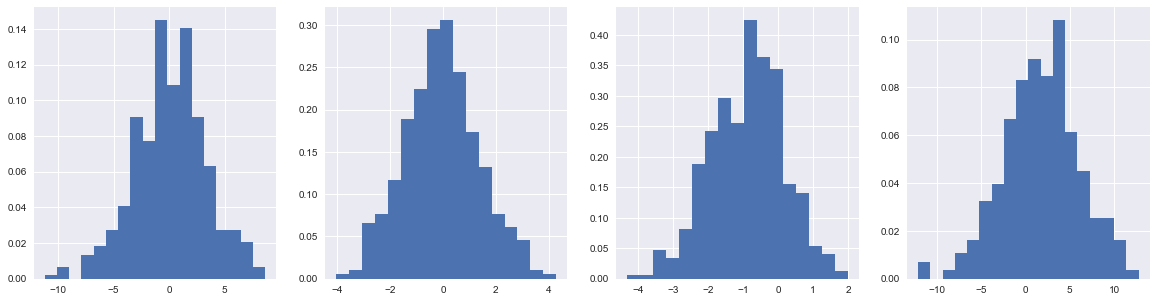

In [8]:
fig, axs = plt.subplots(1,4, figsize = (20,5))
for i in range (4):
    x = 'x' + str(i + 1)
    axs[i].hist(df[x], bins = 'auto', density = True);

***Критерий согласия Колмогорова-Смирнова***

In [9]:
R = []
for i in range(4):
    x = 'x' + str(i + 1)
    st, pv = kstest(df[x], 'norm', args=(df[x].mean(), df[x].std(ddof=1)))
    R.append((st, pv))
    
res = pd.DataFrame(R, columns = ['statistic', 'p-value'])
res.index += 1
res

,statistic,p-value
1,0.035322,0.686844
2,0.026740,0.929838
3,0.037720,0.606067
4,0.023699,0.974320


***Критерий согласия Шапиро-Уилка***

In [10]:
R = []
for i in range(4):
    x = 'x' + str(i + 1)
    st, pv = shapiro(df[x])
    R.append((st, pv))
    
res = pd.DataFrame(R, columns = ['statistic', 'p-value'])
res.index += 1
res

,statistic,p-value
1,0.994705,0.184890
2,0.996626,0.569723
3,0.996467,0.526295
4,0.994108,0.124863


## Эллипсы концентрации

In [11]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


In [12]:
def concentration_ellipses(x, y):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x, y)

    confidence_ellipse(x, y, ax, n_std = 1,
        label = r'$1\sigma$', edgecolor = 'red', lw = 0.8)

    confidence_ellipse(x, y, ax, n_std=  2,
        label = r'$2\sigma$', edgecolor='darkblue', lw = 0.8)

    confidence_ellipse(x, y, ax, n_std = 3,
        label = r'$3\sigma$', edgecolor = 'black', lw = 0.8)
    ax.legend()
    plt.show()

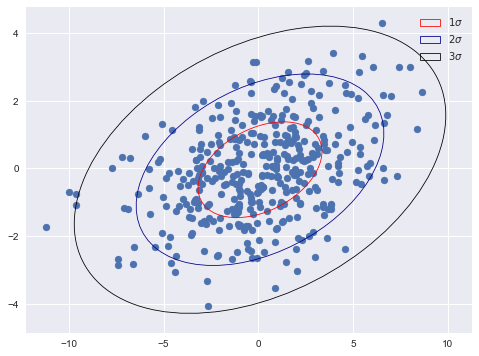

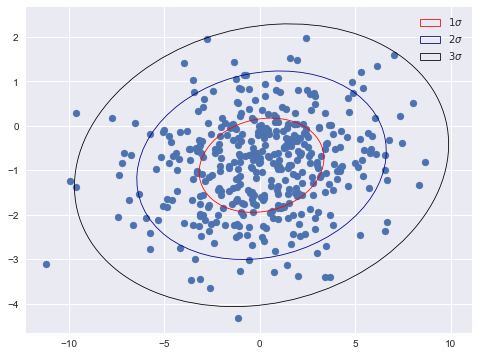

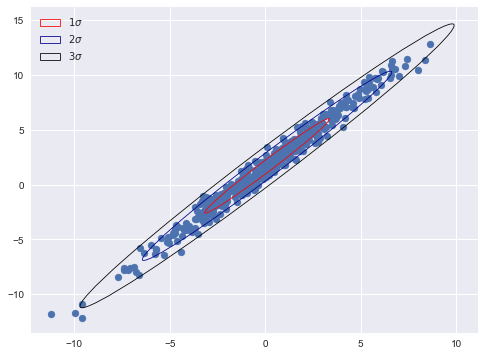

In [13]:
concentration_ellipses(df['x1'], df['x2'])
concentration_ellipses(df['x1'], df['x3'])
concentration_ellipses(df['x1'], df['x4'])

## Смесь распределений

In [14]:
import random
alpha = round(random.uniform(0.2, 0.4), 2)

x5 = alpha * df['x1'] + (1 - alpha) * df['x2']

In [15]:
print(f'Математическое ожидание: {x5.mean()}')

sum = 0
for i in range (N):
    sum += (x5[i] - x5.mean())**2
print(f'Дисперсия: {sum / (N - 1)}')

Математическое ожидание: -0.006060803124775722
Дисперсия: 2.4478266266010142


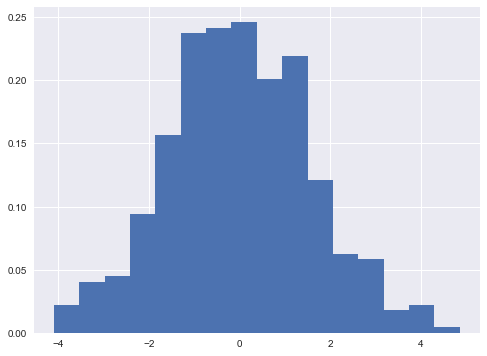

In [16]:
plt.figure(figsize = (8,6))
plt.hist(x5, bins = 'auto', density = True);

***Формулы вычисления мат.ожидания и дисперсии смеси распределений***

In [17]:
cal_mean = df['x1'].mean() * alpha + df['x2'].mean() * (1 - alpha)
print(f'Calculated mean: {cal_mean}')

cal_var = []
cal_var = [pi * (xi.var() + xi.mean()**2 - cal_mean**2) 
                for pi, xi in zip([alpha,(1 - alpha)],[df.x1, df.x2])]

print(f'Calculated var: {cal_var[0] + cal_var[1]}')

Calculated mean: -0.006060803124775697
Calculated var: 4.170438678374017


## Линейные преобразования нормальных случайных величин 

In [18]:
k1, k2, k3, k4 = 5, 6, 9, 10

y1 = k1 * df['x1'] + k3 * df['x3']
y2 = k2 * df['x2'] + k4 * df['x4']

***Вектор мат.ожидания и ковариационная матрица эмпирическим путем***

In [19]:
m_new = [y1.mean(), y2.mean()]
print(f'Вектор математического ожидания: {m_new}')

covmat_new = np.cov(y1, y2, ddof = 1)
print(f'Ковариационная матрица: \n {covmat_new}')

Вектор математического ожидания: [-7.52701380667584, 16.928779383036023]
Ковариационная матрица: 
 [[ 404.49975819  813.95839286]
 [ 813.95839286 2206.72258339]]


***По формулам (С - матрица линейного преобразования):*** 

<img src="Formula.png" width="300" height="300">

In [24]:
C = np.array([[k1, 0, k3, 0], [0, k2, 0, k4]])

M = C.dot(m)
print(f'Вектор математического ожидания: {M}')

Cov = C.dot(covmat).dot(C.T)
print(f'Ковариационная матрица: \n {Cov}')

Вектор математического ожидания: [-7.52701381 16.92877938]
Ковариационная матрица: 
 [[ 404.49975819  813.95839286]
 [ 813.95839286 2206.72258339]]
